>[SVM](#scrollTo=nVvyMbHvlxmY)

>>[A: Data preparation](#scrollTo=FDPpjOW7l6-K)

>>[B: Classifier implementation](#scrollTo=PIMi37YavxTv)

>>[C: Train](#scrollTo=pPSA1yED1laG)

>>[D: Performance measurement](#scrollTo=d2qVIUudNWXb)



#SVM

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## A: Data preparation

In [ ]:
iris = pd.read_csv('iris.csv', index_col=0)

In [ ]:
iris

,sepal length,sepal width,class
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa
...,...,...,...
95,6.7,3.0,Iris-virginica
96,6.3,2.5,Iris-virginica
97,6.5,3.0,Iris-virginica
98,6.2,3.4,Iris-virginica


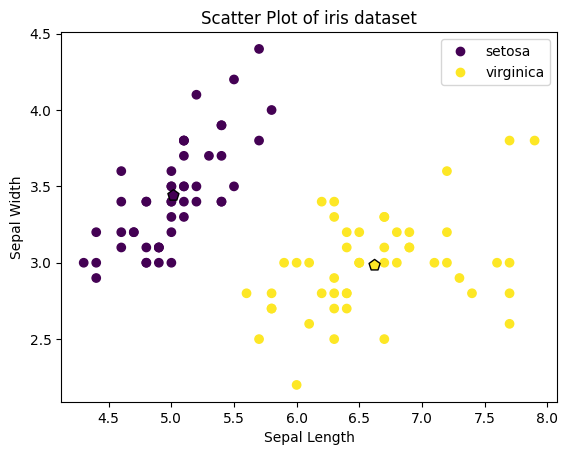

In [ ]:
iris['class'] = pd.Categorical(iris['class'])
labels_code = iris['class'].cat.codes.to_numpy()

scatter = plt.scatter(iris['sepal length'], iris['sepal width'], c=labels_code)
plt.legend(handles=scatter.legend_elements()[0], labels=['setosa','virginica'])

means = iris.groupby('class').mean()
scatter = plt.scatter([means.loc['Iris-setosa']['sepal length'],means.loc['Iris-virginica']['sepal length']],[means.loc['Iris-setosa']['sepal width'], means.loc['Iris-virginica']['sepal width']], marker='p',s=70,c=[-1,1], edgecolor='k')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot of iris dataset')
plt.show()

In [ ]:
test_size = int(len(iris) * 0.2)
test_indices = np.random.choice(iris.index, size=test_size, replace=False)
test_data = iris.loc[test_indices]
train_data = iris.drop(test_indices)

X_test, y_test = test_data.iloc[:,:-1],test_data.iloc[:,-1]
X_train, y_train = train_data.iloc[:,:-1],train_data.iloc[:,-1]

**Label Encoding**

In [ ]:
encoding = {'Iris-setosa': 1, 'Iris-virginica': -1}
y_train_encoded = y_train.map(encoding)
y_test_encoded = y_test.map(encoding)

## B: Classifier implementation

In [ ]:
class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * np.dot(w,w.T)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)


            losses.append(l)

            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:

                            #w.r.t w
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb

        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):

        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction).astype(int)

## C: Train

In [ ]:
svm = SVM(C=5)
w, b, losses = svm.fit(X_train.values, y_train_encoded.values, batch_size=20, learning_rate=0.0001, epochs=1000)

print("weights(w) = ", w)
print("Bias(b) = ", b)

weights(w) =  [[-1.5539746   2.50591197]]
Bias(b) =  0.8395000000000001


## D: Performance measurement

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = svm.predict(X_test)

loss = svm.hingeloss(w, b, X_test.values, y_pred)
print("loss = ", loss)

loss =  4.347215942781775


In [ ]:
print(classification_report(y_pred, y_test_encoded))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [ ]:
def visualize_svm(X_test, y_test, w, b):

    def get_hyperplane_value(x, w, b, offset):
        w_norm = np.linalg.norm(w)
        return (-w[0] * x + b + offset) / w_norm

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], marker="o", c=y_test)

    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X_test[:, 1])
    x1_max = np.amax(X_test[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.legend(handles=scatter.legend_elements()[0], labels=['setosa','virginica'])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM')
    plt.show()

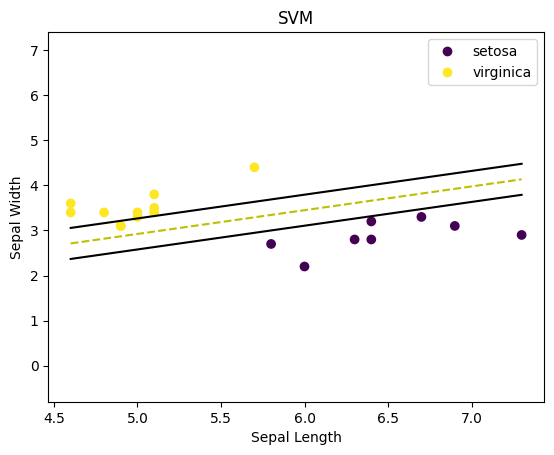

In [ ]:
visualize_svm(X_test.values, y_pred, w, b)